# The Monty Hall Problem

Here is a statement of this famous problem from Alan Downey's book *Think Bayes* (pp. 7-8).

"Monty shows you three closed doors and tells you that there is a prize behind each door: one prize is a car, the other two are less valuable prizes like peanut butter and fake nails. The prizes are arranged at random. The object of the game is to guess which door has the car. If you guess right, you get to keep the car.

- You pick a door, which we'll call Door A. We'll call the other doors B and C.
* Before opening the door you choose, Monty increases the suspense by opening either Door B or C, whichever does not have the car. (If the car is actually behind Door A, Monty can safely open B or C, so he chooses one at random.)
* Then Monty offers you the option to stick with your original choice or switch to the one remaining unopened door.

The questions is, should you 'stick' or 'switch' or does it make a difference? This is not a new problem, so feel free to read what's out there. If you want an example of an analytic way to think through this, rather than the simulation that we're going to be doing, check out: https://arxiv.org/pdf/1208.2638.pdf

We're going to do this the easy way. Let's play the game repeatedly and see how we fare.

In [3]:
from __future__ import division
import random
import itertools

In [4]:
prizes = ["Car", "Peanut Butter", "Fake Nails"]

The contestant chooses a random prize (Door A).

In [5]:
cFirstChoice = random.choice(prizes)
print cFirstChoice

Car


What about Monty's move? There are two cases to consider.

* Case 1: The contestant does not choose the car. In this case, the only option Monty has is to open the door that is not the car and also not the contestant's choice.

* Case 2: The contestant chooses the car. In this case, Monty has a choice of opening either of the two other doors that don't have the car behind them. Let's say he chooses randomly between these possibilities - they're both equally bad in comparison to the valuable car so why not just toss a coin?

In [6]:
if cFirstChoice != "Car":
    # Monty must not choose the car and cannot chose what the contestant choses
    # so he must choose the only other remaining prize available to him
    # To cover the general case of any number of prizes, 
    # we code this as a random choice between the prizes that are available to Monty.
    montyChoice = random.choice(list(set(prizes) - set(["Car", cFirstChoice])))
else:
    montyChoice = random.choice(list(set(prizes) - set(["Car"])))

print cFirstChoice, montyChoice

Car Fake Nails


Now the contestant is given the choice to switch or stick to the original pick. Let's write them out as separate results.

In [7]:
# if the contestant switches, the choice cannot be their first choice nor Monty's choice
cSwitchChoice = random.choice(list(set(prizes) - set([cFirstChoice, montyChoice])))
cNoSwitchChoice = cFirstChoice

print [cFirstChoice, montyChoice, cSwitchChoice, cNoSwitchChoice]

['Car', 'Fake Nails', 'Peanut Butter', 'Car']


## Playing A Single Game of Monty Hall

Let's pull this together into a function that allows us to play the Monty Hall game.

In [8]:
def playMontyHall(prizeList):
    # Contestant makes a first choice
    cFirstChoice = random.choice(prizeList)
    
    # Based on the contestant's first choice, Monty makes his choice of prize to reveal
    if cFirstChoice != "Car":
        # Monty must not choose the car and cannot chose what the contestant choses
        # so he must choose the only other remaining prize available to him
        # To cover the general case of any number of prizes, 
        # we code this as a random choice between the prizes that are available to Monty.
        montyChoice = random.choice(list(set(prizeList) - set(["Car", cFirstChoice])))
    else:
        # Contestant has chosen the car
        montyChoice = random.choice(list(set(prizeList) - set(["Car"])))
    
    # if the contestant switches, the choice cannot be their first choice nor Monty's choice
    choiceSet = list(set(prizeList) - set([cFirstChoice, montyChoice]))
    cSwitchChoice = random.choice(choiceSet)
    cNoSwitchChoice = cFirstChoice

    return { "First Choice" : cFirstChoice, 
            "Monty Choice" : montyChoice, 
            "Prize for Switching" : cSwitchChoice, 
            "Prize for Not Switching" : cNoSwitchChoice }

Test out the function by playing the game a few times...

In [9]:
round1 = playMontyHall(prizes)
print round1
if round1["Prize for Switching"] == "Car":
    print "Correct"

{'Prize for Not Switching': 'Peanut Butter', 'Monty Choice': 'Fake Nails', 'Prize for Switching': 'Car', 'First Choice': 'Peanut Butter'}
Correct


To see how the switching versus not switching strategies do, let's write a function that plays the Monty Hall game repeatedly (say 100,000 times) and tallies up the results for the two strategies.

## Playing Multiple Games of Monty Hall

Without any work we can see how it works out if we play the game a few times...

In [10]:
numGames = 3

In [11]:
sPrizes3 = [prizes for i in range(numGames)]
print sPrizes3

[['Car', 'Peanut Butter', 'Fake Nails'], ['Car', 'Peanut Butter', 'Fake Nails'], ['Car', 'Peanut Butter', 'Fake Nails']]


In [12]:
test = map(playMontyHall, sPrizes3)
print test

[{'Prize for Not Switching': 'Fake Nails', 'Monty Choice': 'Peanut Butter', 'Prize for Switching': 'Car', 'First Choice': 'Fake Nails'}, {'Prize for Not Switching': 'Peanut Butter', 'Monty Choice': 'Fake Nails', 'Prize for Switching': 'Car', 'First Choice': 'Peanut Butter'}, {'Prize for Not Switching': 'Fake Nails', 'Monty Choice': 'Peanut Butter', 'Prize for Switching': 'Car', 'First Choice': 'Fake Nails'}]


Alright. That seems to do it. Let's write a function to play the game many times and tally the results to see how the switching versus not switching strategy fares.

In [13]:
def repeatedMontyHallPlay(prizeList, numGames):
    # prizeList is any list of prizes. It must have only one worthwhile prize,
    # namely, Car. The rest of the prizes (and there can be as many as we want)
    # must all be trivial and unappealing in comparsion to the Car.
    
    # numGames is the number of times you want to play the game.
    
    # From the prizeList, create the prizeListArray
    # prizeListArray is a list of lists -- it contains a prize list that 
    # has been copied a large number of times.
    prizeListArray = [prizeList for i in range(numGames)]
    
    # Play the game repeatedly and collect up the results
    outcomes = [playMontyHall(x) for x in prizeListArray]
    
    # For each outcome, check to see if the prize for switching is a car
    # and the prize for not switching is a car. Tally each result up.
    switchSuccessCount = 0; noSwitchSuccessCount = 0;
    
    for outcome in outcomes:
        if outcome["Prize for Switching"] == "Car":
            switchSuccessCount += 1
        if outcome["Prize for Not Switching"] == "Car":
            noSwitchSuccessCount += 1
    
    try:
        switchSuccessRatio = switchSuccessCount/noSwitchSuccessCount
    except ZeroDivisionError:
        switchSuccessRatio = "Not Defined"
    
    return switchSuccessCount/numGames, noSwitchSuccessCount/numGames, switchSuccessRatio

## Extending the Game to Include More Prizes

In addition to playing the game repeatedly, we can also see what difference it makes to have more than 3 prizes.

What happens when there are more than 3 doors? Is switching still the best strategy?

We can answer this question by making up a number of different sets of prizes.

In [14]:
prizes4 = ["Car", "Peanut Butter", "Fake Nails", "Lemon"]
prizes5 = ["Car", "Peanut Butter", "Fake Nails", "Lemon", "Pencil"]
prizes6 = ["Car", "Peanut Butter", "Fake Nails", "Lemon", "Pencil", "Quarter"]
prizes7 = ["Car", "Peanut Butter", "Fake Nails", "Lemon", "Pencil", "Quarter", "Carrot"]
prizes8 = ["Car", "Peanut Butter", "Fake Nails", "Lemon", "Pencil", "Quarter", "Carrot", "Tinsel"]
prizes20 = ["Car", "Peanut Butter", "Fake Nails", "Lemon", "Pencil", "Quarter", "Carrot", "Tinsel",
           "String", "Paper", "Button", "Lint", "Rick Springfield Poster", "Dime", "Penny", "Photo of Robburrito",
           "Mug", "T-Shirt", "Used Rubber Glove", "Pebble"]

And now let's play the game 10,000 times with the list of 3 prizes we started with.

In [15]:
repeatedMontyHallPlay(prizes, 10000)

(0.6721, 0.3279, 2.0497102775236353)

And how about playing the game 10,000 times with 6 prizes?

In [16]:
repeatedMontyHallPlay(prizes6, 10000)

(0.2061, 0.1641, 1.2559414990859232)

In [17]:
repeatedMontyHallPlay(prizes20, 10000)

(0.0504, 0.0423, 1.1914893617021276)

My intuition is that as the number of prizes (and doors) increases, the information that Monty provides by opening a door to reveal a trivial prize decreases. From the above trials it looks like this intuition is on the right track, but let's investigate it systematically. 

First, get the results for repeated play with 3, 4, 5, 6, 7, 8, and why not, 20 doors.

In [18]:
res = [list(repeatedMontyHallPlay(x, 10000)) for x in [prizes, prizes4, prizes5, prizes6, prizes7, prizes8, prizes20]]
print res

[[0.6762, 0.3238, 2.0883261272390365], [0.3779, 0.2517, 1.5013905442987683], [0.2723, 0.1979, 1.3759474482061647], [0.2055, 0.1723, 1.1926871735345328], [0.1757, 0.1387, 1.2667627974044702], [0.1486, 0.1281, 1.160031225604996], [0.0498, 0.0463, 1.0755939524838012]]


In [19]:
# Row Labels
rowLabels = [["3"], ["4"], ["5"], ["6"], ["7"], ["8"], ["20"]]

In [20]:
def addRowLabels(rowLabels, data):
    # rowLabels are in the form [["row1Label"], ["rowLabel2"],...["rowLabeln"]]
    # data is in the form of an array with n rows -- the number of columns is irrelevant here
    
    # First check if the length of rowLabels is equal to the length of data
    # If not, exit the function
    if len(rowLabels) != len(data):
        return "Please make sure the number of row labels is the same as the number of rows of data."
    
    # Initialize the final array
    finR = []
    
    # Now add each row label in turn
    for i, d in enumerate(data):
        finR.append(rowLabels[i] + d)
        
    return finR

In [21]:
tableVals = addRowLabels(rowLabels, res)
print tableVals

[['3', 0.6762, 0.3238, 2.0883261272390365], ['4', 0.3779, 0.2517, 1.5013905442987683], ['5', 0.2723, 0.1979, 1.3759474482061647], ['6', 0.2055, 0.1723, 1.1926871735345328], ['7', 0.1757, 0.1387, 1.2667627974044702], ['8', 0.1486, 0.1281, 1.160031225604996], ['20', 0.0498, 0.0463, 1.0755939524838012]]


In [22]:
from tabulate import tabulate
colLabels = ["Num of Doors/Prizes", "P(Car on Switching)", "P(Car on Not Switching)", "Success Ratio"]
print tabulate(tableVals, colLabels, tablefmt="simple")

  Num of Doors/Prizes    P(Car on Switching)    P(Car on Not Switching)    Success Ratio
---------------------  ---------------------  -------------------------  ---------------
                    3                 0.6762                     0.3238          2.08833
                    4                 0.3779                     0.2517          1.50139
                    5                 0.2723                     0.1979          1.37595
                    6                 0.2055                     0.1723          1.19269
                    7                 0.1757                     0.1387          1.26676
                    8                 0.1486                     0.1281          1.16003
                   20                 0.0498                     0.0463          1.07559


So our intuition *does* hold. As the number of doors increases the probability of winning when you switch steadily drops. When there are 20 doors, there's hardly any advantage to switching. Let's visualize this before we go on to other things.

In [23]:
%matplotlib inline

/Users/jsubapple/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)

In [26]:
switchSuccess = [r[0:1] for r in res]
print switchSuccess

noSwitchSuccess = [r[1:2] for r in res]
print noSwitchSuccess

successRatio = [r[2:3] for r in res]
print successRatio

# Set up the plot's x axis
xs = [i for i, _ in enumerate(switchSuccess)]
print xs

[[0.6762], [0.3779], [0.2723], [0.2055], [0.1757], [0.1486], [0.0498]]
[[0.3238], [0.2517], [0.1979], [0.1723], [0.1387], [0.1281], [0.0463]]
[[2.0883261272390365], [1.5013905442987683], [1.3759474482061647], [1.1926871735345328], [1.2667627974044702], [1.160031225604996], [1.0755939524838012]]
[0, 1, 2, 3, 4, 5, 6]


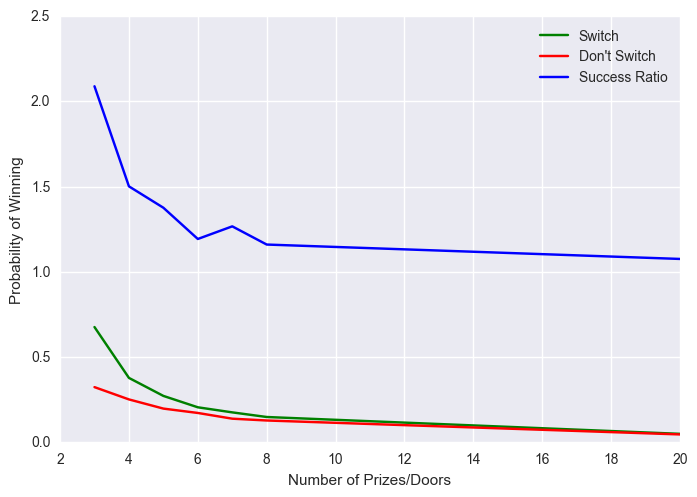

In [27]:
sns.set_style("darkgrid")
# plt.plot(snsData)
plt.plot(rowLabels, switchSuccess, "g-", label="Switch")
plt.plot(rowLabels, noSwitchSuccess, "r-", label="Don't Switch")
plt.plot(rowLabels, successRatio, "b-", label="Success Ratio")
plt.legend(loc=1)
plt.xlabel("Number of Prizes/Doors")
plt.ylabel("Probability of Winning")
plt.show()

## A Weird Interlude: Should I Switch or Not?

Now for something strange. Get used to it because probability is full of this kind of strageness.

The success ratios we discovered above come from playing the game many many times. So it's clear that if you play against Monty a large number of times you should *definitely* switch.

But here's the rub. You only get to play Monty *once*. Or maybe you get to play him a few times. What should you do? Does it matter?

Perhaps the historian Edward Gibbon put it best when he said, “The laws of probability, so true in general, so fallacious in particular.”

Let's see why Gibbon's on to something.

What happens when you play the game just once?

In [28]:
p1 = [repeatedMontyHallPlay(prizes, 1) for i in range(3)] 
print p1
winsBySwitching = [p[0:1] for p in p1]
winsByNotSwitching = [p[1:2] for p in p1]
wins = [p[0:2] for p in p1]
print winsBySwitching, winsByNotSwitching, wins
# Add up the times people won by switching and not switching
tots = [sum(win) for win in zip(*wins)]
print tots

[(0.0, 1.0, 0.0), (0.0, 1.0, 0.0), (1.0, 0.0, 'Not Defined')]
[(0.0,), (0.0,), (1.0,)] [(1.0,), (1.0,), (0.0,)] [(0.0, 1.0), (0.0, 1.0), (1.0, 0.0)]
[1.0, 2.0]


Well, we're back to repeating our games, but it's just to show you that when you play the game, sometimes you win and sometimes you lose. When you only play a small number of times, it doesn't seem to matter whether you switch or not because the counts of the wins using either strategy are roughly equal.

Let's see if we can confirm this when a large number of people play a single game with Monty.

In [29]:
# Let numPlayers people each play a single game with Monty
numPlayers = 1
p1Star = [repeatedMontyHallPlay(prizes, 1) for i in range(numPlayers)]
# Tally up the times people won by switching and the times they won by not switching
wins = [p[0:2] for p in p1Star]
#print wins
# Add up the times people won by switching and not switching
tots1 = [sum(win)/numPlayers for win in zip(*wins)]
print tots1

[1.0, 0.0]


In [30]:
# A number of players, each having one game against Monty
# Or, you can think of it as one player playing just a handful of games against Monty
def playOneGame(numPlayers, prizeList):
    # numPlayers players, each playing the game once
    # To be sensible, numPlayers must be a SMALL number (at maximum = 10)
    outcomes = [repeatedMontyHallPlay(prizeList, 1) for i in range(numPlayers)]
    # Tally up the number of people who won by switching and the number who won by not switching
    wins = [outcome[0:2] for outcome in outcomes]
    
    # Add up the times people won by switching and not switching
    # This will give a list of two elements [num people who won by switching, num people who won by not switching]
    # The list is then normalized by the number of players, hence becoming a relative frequency
    # of winning by switching and not switching
    winTotals = [sum(win) for win in zip(*wins)]
    winProbs = [winTotal/numPlayers for winTotal in winTotals]
    return winProbs

### Wins by Switching and Not Switching: A Number of Players Each Playing the Game Once

In [31]:
# n players each playing the game once playing the game oncerange(n) people each playing a game 
# 3 Doors
p3_3_Outcomes = [playOneGame(3, prizes) for i in range(30)]
p5_3_Outcomes = [playOneGame(5, prizes) for i in range(30)]
p10_3_Outcomes = [playOneGame(10, prizes) for i in range(30)]
p100_3_Outcomes = [playOneGame(100, prizes) for i in range(30)]

# 8 Doors
p3_8_Outcomes = [playOneGame(3, prizes8) for i in range(30)]
p5_8_Outcomes = [playOneGame(5, prizes8) for i in range(30)]
p10_8_Outcomes = [playOneGame(10, prizes8) for i in range(30)]
p100_8_Outcomes = [playOneGame(100, prizes8) for i in range(30)]

#print p3_3_Outcomes

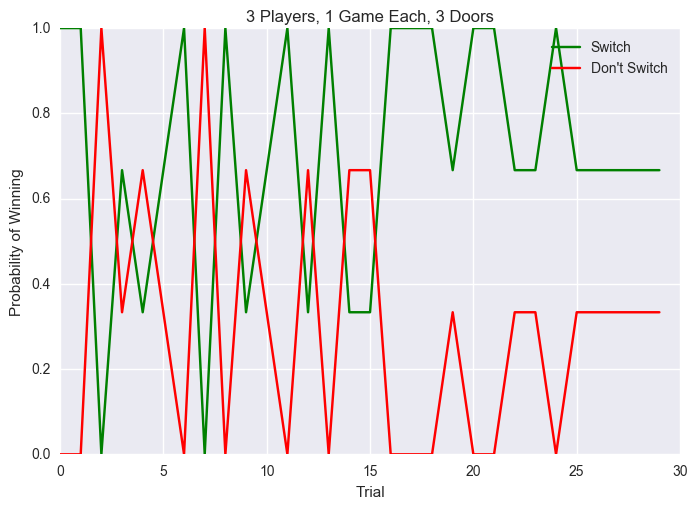

In [32]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p3_3_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p3_3_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("3 Players, 1 Game Each, 3 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

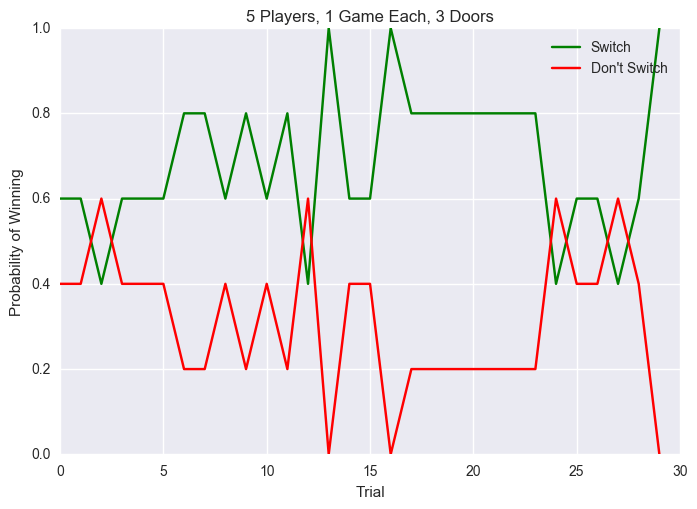

In [33]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p5_3_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p5_3_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("5 Players, 1 Game Each, 3 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

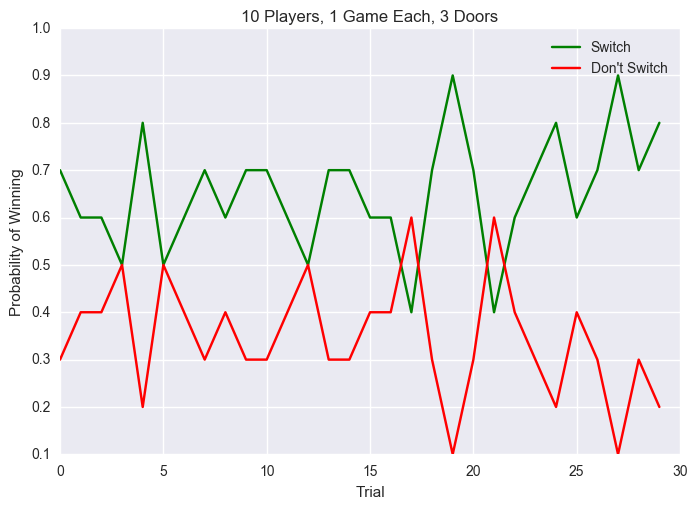

In [34]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p10_3_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p10_3_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("10 Players, 1 Game Each, 3 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

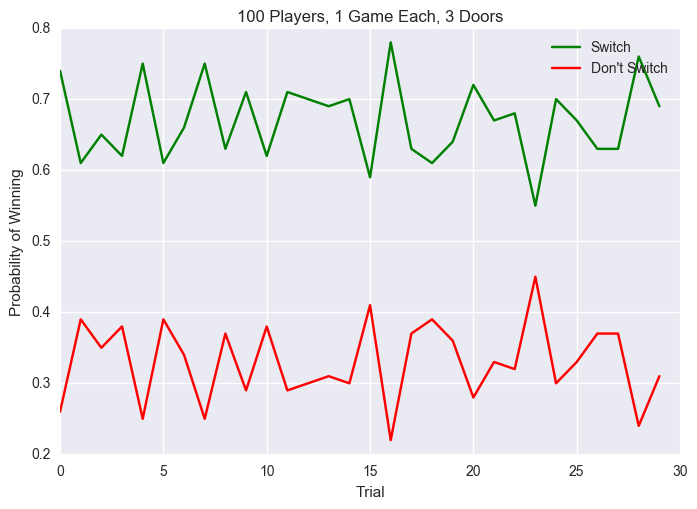

In [35]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p100_3_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p100_3_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("100 Players, 1 Game Each, 3 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

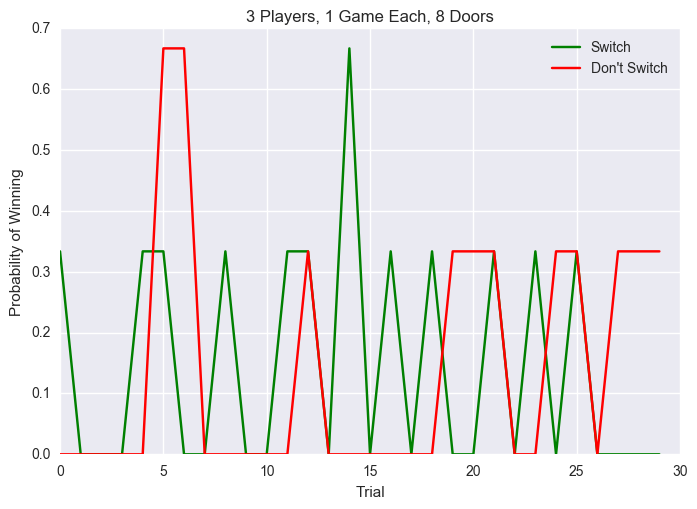

In [36]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p3_8_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p3_8_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("3 Players, 1 Game Each, 8 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

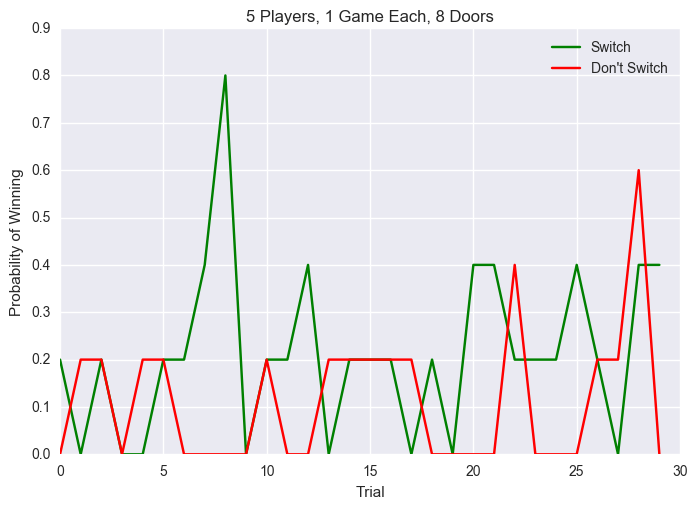

In [37]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p5_8_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p5_8_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("5 Players, 1 Game Each, 8 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

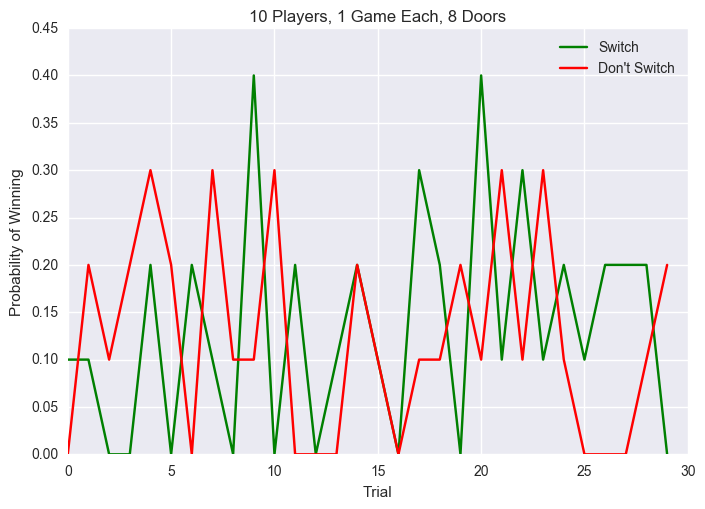

In [38]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p10_8_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p10_8_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("10 Players, 1 Game Each, 8 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

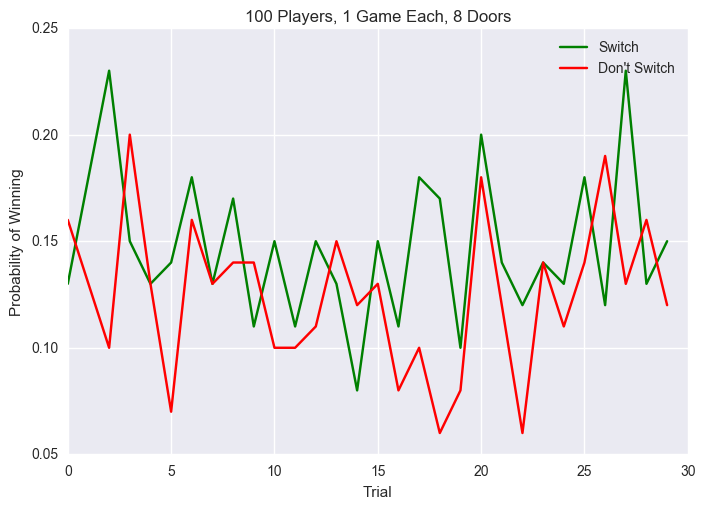

In [39]:
sns.set_style("darkgrid")
plt.plot([p[0:1] for p in p100_8_Outcomes], "g-", label="Switch")
plt.plot([p[1:2] for p in p100_8_Outcomes], "r-", label="Don't Switch")
plt.legend(loc=1)
plt.title("100 Players, 1 Game Each, 8 Doors")
plt.xlabel("Trial")
plt.ylabel("Probability of Winning")
plt.show()

This is the strange thing about probability. On a single trial, any of the possibilities *can* occur. You can lose if you switch; you can win if you switch. All you have is that one shot. Why should you be swayed by the cumulative results of a lot of people playing the game once or by your imaginary self playing the game a large number of times?

Well, the short answer is you *shouldn't*. If you only have one shot at it, then do whatever moves you -- it really doesn't matter. But if you're betting on some holistic measure (like the average) results of a large number of games, then you *should* by all means bet that switching is going to be the way to go.

This kind of reasoning applies when two conditions are satisfied:
* there's some situation in the real world where there are repeated trials going on, 
* there is a large number of these repeated trials, *and*, 
* you're making a guess only about a holistic measure that applies to the bunch of trials as a whole (not about a particular item in that bunch).

Ask yourself: In playing just one (or a few) games with Monty, does it make any difference whether you switch from your initial choice or not? Perhaps the best strategy here is to toss a coin to decide.

We'll come back to this idea in a bit when we probe the difference between *uncertainty* and *risk*.

## Extending the Many Doors Game By Having Monty Open Many Doors Instead of Just One

The intuition here is as the number of doors increases *and* Monty keeps revealing more doors, the benefits of switching increase.

Let's use the case where there are 8 doors to investigate. To do so we'll modify the playMontyHall and the repeatedMontyHallPlay functions. They'll only require a little bit of tweaking.

In [121]:
# Modify the playMontyHall function to accommodate Monty opening k of n total doors
# where k must be less than or equal to n-2

def playMontyHallExt(prizeList, numDoorsOpened):
    # prizeList is a list of prizes of any length
    # numDoorsOpened is an integer specifying the number of doors that 
    # Monty opens after the player has made his first choice.
    
    # ADDED
    # Make sure that the numDoorsOpened is greater than 0 and at most 2 fewer than the number of prizes
    if (numDoorsOpened > len(prizeList) - 2) or (numDoorsOpened <= 0):
        return "Please make sure that the number of doors specified is greater than 0 and at most 2 fewer than the number of prizes."
    
    # Contestant makes a first choice
    cFirstChoice = random.choice(prizeList)
    
    # Based on the contestant's first choice, Monty makes his choice of prize to reveal
    if cFirstChoice != "Car":
        # Monty must not choose the car and cannot chose what the contestant choses
        # Also, Monty must choose a certain number of prizes specified by numDoorsOpened
        montyChoice = random.sample(list(set(prizeList) - set(["Car", cFirstChoice])), numDoorsOpened) # CHANGED
    else:
        # Contestant has chosen the car
        montyChoice = random.sample(list(set(prizeList) - set(["Car"])), numDoorsOpened) # CHANGED
    
    # if the contestant switches, the choice cannot be their first choice nor Monty's choice
    choiceSet = list(set(prizeList) - set(montyChoice + [cFirstChoice])) # CHANGED
    cSwitchChoice = random.choice(choiceSet)
    cNoSwitchChoice = cFirstChoice

    return { "First Choice" : cFirstChoice, 
            "Monty Choice" : montyChoice, 
            "Prize for Switching" : cSwitchChoice, 
            "Prize for Not Switching" : cNoSwitchChoice
           }

In [123]:
playMontyHallExt(prizes7, 3)

{'First Choice': 'Quarter',
 'Monty Choice': ['Peanut Butter', 'Carrot', 'Lemon'],
 'Prize for Not Switching': 'Quarter',
 'Prize for Switching': 'Pencil'}

In [102]:
def repeatedMontyHallPlayExt(prizeList, numDoorsOpened, numGames):
    # prizeList is any list of prizes. It must have only one worthwhile prize,
    # namely, Car. The rest of the prizes (and there can be as many as we want)
    # must all be trivial and unappealing in comparsion to the Car.
    
    # ADDED
    # numDoors is the number of doors that Monty will open
    # Make sure that the numDoorsOpened is greater than 0 and at most 2 fewer than the number of prizes
    if (numDoorsOpened > len(prizeList) - 2) or (numDoorsOpened <= 0):
        return "Please make sure that the number of doors specified is greater than 0 and at most 2 fewer than the number of prizes."
    
    # numGames is the number of times you want to play the game.
    
    # From the prizeList, create the prizeListArray
    # prizeListArray is a list of lists -- it contains a prize list that 
    # has been copied a large number of times.
    prizeListArray = [prizeList for i in range(numGames)]
    
    # Play the game repeatedly and collect up the results
    outcomes = [playMontyHallExt(x, numDoorsOpened) for x in prizeListArray] # CHANGED
    
    # For each outcome, check to see if the prize for switching is a car
    # and the prize for not switching is a car. Tally each result up.
    switchSuccessCount = 0; noSwitchSuccessCount = 0;
    
    for outcome in outcomes:
        if outcome["Prize for Switching"] == "Car":
            switchSuccessCount += 1
        if outcome["Prize for Not Switching"] == "Car":
            noSwitchSuccessCount += 1
    
    try:
        switchSuccessRatio = switchSuccessCount/noSwitchSuccessCount
    except ZeroDivisionError:
        switchSuccessRatio = "Not Defined"
    
    return switchSuccessCount/numGames, noSwitchSuccessCount/numGames, switchSuccessRatio

In [118]:
repeatedMontyHallPlayExt(prizes8, 1, 10000)

(0.147, 0.1265, 1.1620553359683794)

In [125]:
resExt = [list(repeatedMontyHallPlayExt(prizes8, x, 10000)) for x in [1,2,3,4,5,6]]
print resExt

[[0.148, 0.1212, 1.221122112211221], [0.1798, 0.1335, 1.3468164794007491], [0.2217, 0.128, 1.73203125], [0.2944, 0.1246, 2.362760834670947], [0.4385, 0.1262, 3.474643423137876], [0.8744, 0.1256, 6.961783439490445]]


Tablulate the results for the case of 8 prizes.

In [130]:
rowLabelsExt = [["1"], ["2"], ["3"], ["4"], ["5"], ["6"]]
tableValsExt = addRowLabels(rowLabelsExt, resExt)
print tableValsExt

[['1', 0.148, 0.1212, 1.221122112211221], ['2', 0.1798, 0.1335, 1.3468164794007491], ['3', 0.2217, 0.128, 1.73203125], ['4', 0.2944, 0.1246, 2.362760834670947], ['5', 0.4385, 0.1262, 3.474643423137876], ['6', 0.8744, 0.1256, 6.961783439490445]]


In [131]:
colLabelsExt = ["Num of Doors Monty Opens", "P(Car on Switching)", "P(Car on Not Switching)", "Success Ratio"]
print tabulate(tableValsExt, colLabelsExt, tablefmt="simple")

  Num of Doors Monty Opens    P(Car on Switching)    P(Car on Not Switching)    Success Ratio
--------------------------  ---------------------  -------------------------  ---------------
                         1                 0.148                      0.1212          1.22112
                         2                 0.1798                     0.1335          1.34682
                         3                 0.2217                     0.128           1.73203
                         4                 0.2944                     0.1246          2.36276
                         5                 0.4385                     0.1262          3.47464
                         6                 0.8744                     0.1256          6.96178


When there are 8 prizes and Monty opens only 1 door, the probability of winning by switching is pretty much the same as the probability of winning by not switching. You can see that that success ratio on the first row of the table above is close to 1.

But, as our intuition indicates, when there are lots of prizes and Monty keeps opening more and more doors, the probability of winning by switching becomes enormous. When Monty opens 6 doors (the maximum he can in the case of 8 prizes), the success ratio is close to 7!

On the other hand, the probability of winning by not switching stays pretty much the same no matter how many doors Monty opens. That seems sensible too -- after all, you had rougly a 1/8 chance of picking the car on your first choice and 1/8 is 0.125.

Let' visualize this result become we call it a day.

In [127]:
switchSuccessExt = [r[0:1] for r in resExt]
print switchSuccessExt

noSwitchSuccessExt = [r[1:2] for r in resExt]
print noSwitchSuccessExt

successRatioExt = [r[2:3] for r in resExt]
print successRatioExt

# Set up the plot's x axis
xs = [i+1 for i, _ in enumerate(switchSuccessExt)]
print xs

[[0.148], [0.1798], [0.2217], [0.2944], [0.4385], [0.8744]]
[[0.1212], [0.1335], [0.128], [0.1246], [0.1262], [0.1256]]
[[1.221122112211221], [1.3468164794007491], [1.73203125], [2.362760834670947], [3.474643423137876], [6.961783439490445]]
[1, 2, 3, 4, 5, 6]


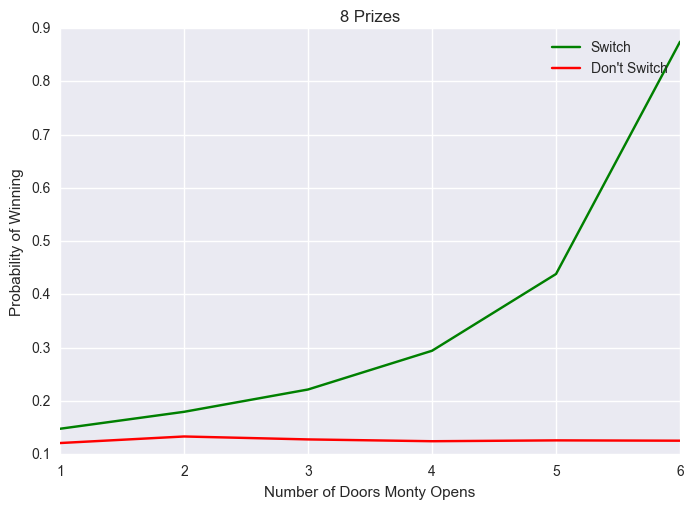

In [134]:
sns.set_style("darkgrid")
plt.plot(rowLabelsExt, switchSuccessExt, "g-", label="Switch")
plt.plot(rowLabelsExt, noSwitchSuccessExt, "r-", label="Don't Switch")
# plt.plot(rowLabelsExt, successRatioExt, "b-", label="Success Ratio")
plt.legend(loc=1)
plt.title("8 Prizes")
plt.xlabel("Number of Doors Monty Opens")
plt.ylabel("Probability of Winning")
plt.show()

## Summary

Instead of working with equations we took the Monty Hall problem and solved it using simulation. This process gave us an understanding of how the problem works and enabled us to easily extend the problem. We also briefly puzzled over whether or not probabilistic reasoning can guide a single particular action.

We'll do a lot more simulation and will pick up the puzzle over the practical application of probability when we consider topics like the difference between uncertainty and risk.